In [3]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that I'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python


import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [4]:

file="c:\\Users\mehrz\Documents\Python Scripts\online_retail_2.csv"

#file="https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

df= pd.read_csv(file)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.shape

(1067371, 8)

# Remove missing data

In [6]:
#check missing values for each column
df.isnull().sum().sort_values(ascending=False)

Customer ID    243007
Description      4382
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64

In [7]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [8]:
# If I want to make a new DF without missing values >>>  df_no_missing = df.dropna()
# also we could use df.dropna(inplace = True)

In [9]:
# I wanted just to remove the blank customer IDs
df2 = df[pd.notnull(df['Customer ID'])]

In [10]:
# check missing values for each column 
df2.isnull().sum().sort_values(ascending=False)

Country        0
Customer ID    0
Price          0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
Invoice        0
dtype: int64

In [11]:
# it is seen by removing missing IDs there remain no missing description! interesting incident.

# Remove returining dara

In [12]:
df2[df2['Quantity']<0].count()

Invoice        18744
StockCode      18744
Description    18744
Quantity       18744
InvoiceDate    18744
Price          18744
Customer ID    18744
Country        18744
dtype: int64

In [13]:
a=df2['Quantity']<0
a

0          False
1          False
2          False
3          False
4          False
           ...  
1067366    False
1067367    False
1067368    False
1067369    False
1067370    False
Name: Quantity, Length: 824364, dtype: bool

In [14]:
df2[a]['Quantity'].count()  #or  df2[df2.Quantity < 0]['Quantity'].count()

18744

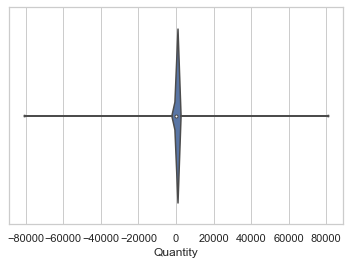

In [15]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

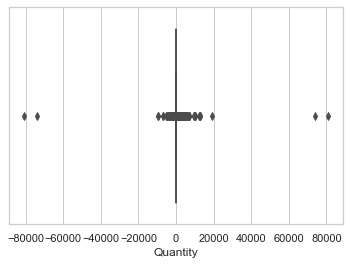

In [16]:
sns.boxplot(x=df2['Quantity'])

In [17]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]     # or     df2 = df2.loc[df2['Quantity'] > 0]

df2.describe().round(2)

,Quantity,Price,Customer ID
count,805620.00,805620.00,805620.00
mean,13.31,3.21,15331.86
std,144.31,29.20,1696.77
min,1.00,0.00,12346.00
25%,2.00,1.25,13982.00
50%,5.00,1.95,15271.00
75%,12.00,3.75,16805.00
max,80995.00,10953.50,18287.00


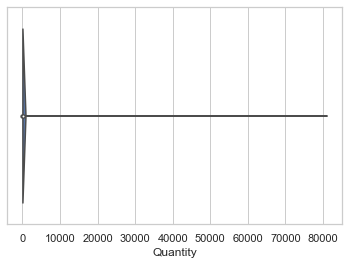

In [18]:
ax = sns.violinplot(x=df2["Quantity"])

In [19]:
df2['Quantity'].count()

805620

In [20]:
# mind where we use ' ' and where " " 
# df2['Customer ID']>100
# df[["Quantity"]].head(3)
# df[["Quantity", "Price"]].head(3)

In [21]:
# mind where we use .attr wher .loc[attr]

# for example dd=df2. Customer ID in not gonna work

# Data type Correction

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [23]:
# change the invoice_date string format to Timestamp format
df2['InvoiceDate'] = pd.to_datetime(df2.InvoiceDate, format='%Y-%m-%d %H:%M:%S' , errors='ignore')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB


In [25]:
# change columns type - String to Int type 
df2['Customer ID'] = df2['Customer ID'].astype('int64')

# or e.g. df2 = df2.astype({"Name":'category', "Age":'int64'}) 

In [26]:
after=type(df2['Customer ID'][0])
after

numpy.int64

# Transaction time modification

In [27]:
# View our data range
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00


In [28]:
# Take all of the transactions tdating before December 01, 2011 
#df2 = df2.loc[df2['InvoiceDate'] > '2009-12-31']


# I got 2011-10-01 otherwise the pd.grouper(freq) in the folloing cells will not devid the revenues properly

In [29]:
#df2 = df2.loc[df2['InvoiceDate'] < '2011-09-30']

In [30]:
df2.head(2)  # or df2[:10] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [31]:
# To delet the out put:
#from IPython.display import clear_output
#clear_output(wait=True)

# Create a Sales Revenue Column

In [32]:
df2['AmountSpent'] = df2['Quantity'] * df2['Price']
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,AmountSpent
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


# Customer Life Time Value

In [33]:
# To study the 3 month customet value I need to get an order's summary dataset 
# that shows the total in sales made per customer invoice

orders_df = df2.groupby(['Customer ID', 'Invoice']).agg({'AmountSpent': sum,'InvoiceDate': max})
orders_df.head(2)

AmountSpent         InvoiceDate
Customer ID Invoice                                 
12346       491725          45.0 2009-12-14 08:34:00
            491742          22.5 2009-12-14 11:00:00

# .



# To predict the 3 month CLTV, I need to make a summary statistics of customer Sales in 3 month intervals (I use 3M for 3 month)

# For this aim, I Groupby customer ID now, and group all invoices for 3 month cycles and then  Aggregate on sum, mean and counts.

# Note: Updated invoice date are just 3 month intervals, not original purchase dates

In [34]:
# At the begining I need to define some functions for mean and count:


def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

#......................................................................




clv_freq = '3M'

data_df = orders_df.reset_index().groupby(['Customer ID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'AmountSpent': [sum, groupby_mean, groupby_count],})

data_df.head(2)

AmountSpent             
                                sum    avg count
Customer ID InvoiceDate                         
12346       2009-12-31       113.50  22.70   5.0
            2010-03-31       117.05  23.41   5.0

In [35]:
# now I re-write the indexes and culomn's names of the above DataFrame

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head(2)

,Customer ID,InvoiceDate,amountspent_sum,amountspent_avg,amountspent_count
0,12346,2009-12-31,113.50,22.70,5.0
1,12346,2010-03-31,117.05,23.41,5.0


In [36]:
# Lets double check if our time period is all set


In [37]:
print('Date Range: %s to %s' % (data_df['InvoiceDate'].min(), data_df['InvoiceDate'].max()))

Date Range: 2009-12-31 00:00:00 to 2011-12-31 00:00:00


In [38]:
#what is the data type for InvoiceDate
type(data_df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
TimeStepArray=sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
TimeStepArray


# here we can see why we got the 2011-10-01 as upper time limit 
# I also use this timesteparray in the next command

[numpy.datetime64('2011-12-31T00:00:00.000000000'),
 numpy.datetime64('2011-09-30T00:00:00.000000000'),
 numpy.datetime64('2011-06-30T00:00:00.000000000'),
 numpy.datetime64('2011-03-31T00:00:00.000000000'),
 numpy.datetime64('2010-12-31T00:00:00.000000000'),
 numpy.datetime64('2010-09-30T00:00:00.000000000'),
 numpy.datetime64('2010-06-30T00:00:00.000000000'),
 numpy.datetime64('2010-03-31T00:00:00.000000000'),
 numpy.datetime64('2009-12-31T00:00:00.000000000')]

In [40]:
# Now I want to creat a new culomn indication Sale quarters in Terms of M_k

DateToQuarter = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(TimeStepArray)}


data_df['M'] = data_df['InvoiceDate'].apply(lambda x: DateToQuarter[str(x)[:10]])
data_df.head(12)

,Customer ID,InvoiceDate,amountspent_sum,amountspent_avg,amountspent_count,M
0,12346,2009-12-31,113.50,22.700,5.0,M_9
1,12346,2010-03-31,117.05,23.410,5.0,M_8
2,12346,2010-06-30,142.31,142.310,1.0,M_7
3,12346,2011-03-31,77183.60,77183.600,1.0,M_4
4,12347,2010-12-31,2035.11,1017.555,2.0,M_5
5,12347,2011-03-31,475.39,475.390,1.0,M_4
6,12347,2011-06-30,1018.77,509.385,2.0,M_3
7,12347,2011-09-30,584.91,584.910,1.0,M_2
8,12347,2011-12-31,1519.14,759.570,2.0,M_1
9,12348,2010-09-30,222.16,222.160,1.0,M_6


In [41]:
data_df.shape

(18026, 6)

In [42]:
# Check the Quarters

data_df['M'].unique()

array(['M_9', 'M_8', 'M_7', 'M_4', 'M_5', 'M_3', 'M_2', 'M_1', 'M_6'],
      dtype=object)

In [43]:
#Since M1 and M9 are not a complete quarter I remove them.

data_df=data_df.loc[data_df['M']!='M_1']

In [44]:
data_df=data_df.loc[data_df['M']!='M_9']

In [45]:
data_df['M'].unique()

array(['M_8', 'M_7', 'M_4', 'M_5', 'M_3', 'M_2', 'M_6'], dtype=object)

In [46]:
# To create my Features DF , I use Pivot_table in pandas, reshaping my current DataFrame
# at the same time I choose the data related to M2 as response data and remove it

features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_2'],index='Customer ID', columns='M', values=['amountspent_sum', 'amountspent_avg', 'amountspent_count'])

features_df.head()

amountspent_avg                                             \
M                       M_3       M_4       M_5     M_6     M_7    M_8   
Customer ID                                                              
12346                   NaN  77183.60       NaN     NaN  142.31  23.41   
12347               509.385    475.39  1017.555     NaN     NaN    NaN   
12348               367.000    227.44   892.800  222.16     NaN    NaN   
12349                   NaN       NaN  1402.620     NaN  634.26    NaN   
12350                   NaN    334.40       NaN     NaN     NaN    NaN   

            amountspent_count                          amountspent_sum  \
M                         M_3  M_4  M_5  M_6  M_7  M_8             M_3   
Customer ID                                                              
12346                     NaN  1.0  NaN  NaN  1.0  5.0             NaN   
12347                     2.0  1.0  2.0  NaN  NaN  NaN         1018.77   
12348                     1.0  1.0  1.0  1.0  NaN  NaN          367.00   
12349                     NaN  NaN  1.0  NaN  2.0  NaN             NaN   
12350                     NaN  1.0  NaN  NaN  NaN  NaN             NaN   

                                                         
M                 M_4      M_5     M_6      M_7     M_8  
Customer ID                                              
12346        77183.60      NaN     NaN   142.31  117.05  
12347          475.39  2035.11     NaN      NaN     NaN  
12348          227.44   892.80  222.16      NaN     NaN  
12349             NaN  1402.62     NaN  1268.52     NaN  
12350          334.40      NaN     NaN      NaN     NaN

In [47]:
# Now I consolidate the culomn's names

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,amountspent_avg_M_3,amountspent_avg_M_4,amountspent_avg_M_5,amountspent_avg_M_6,amountspent_avg_M_7,amountspent_avg_M_8,amountspent_count_M_3,amountspent_count_M_4,amountspent_count_M_5,amountspent_count_M_6,amountspent_count_M_7,amountspent_count_M_8,amountspent_sum_M_3,amountspent_sum_M_4,amountspent_sum_M_5,amountspent_sum_M_6,amountspent_sum_M_7,amountspent_sum_M_8
Customer ID,,,,,,,,,,,,,,,,,,
12346,NaN,77183.60,NaN,NaN,142.31,23.41,NaN,1.0,NaN,NaN,1.0,5.0,NaN,77183.60,NaN,NaN,142.31,117.05
12347,509.385,475.39,1017.555,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,1018.77,475.39,2035.11,NaN,NaN,NaN
12348,367.000,227.44,892.800,222.16,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,367.00,227.44,892.80,222.16,NaN,NaN
12349,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN
12350,NaN,334.40,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN


In [48]:
features_df.shape

(4943, 18)

In [49]:
# Now I make the response df using M2 data
# In comming cells I will name my Target Variable as (target_var = 'CLV_'+clv_freq)


response_df = data_df.loc[data_df['M'] == 'M_2', ['Customer ID', 'amountspent_sum']]

response_df.columns = ['Customer ID', 'CLV_'+clv_freq]
response_df.head()

,Customer ID,CLV_3M
7,12347,584.91
13,12348,310.00
21,12352,632.50
37,12358,484.86
50,12360,534.70


In [50]:
response_df.shape

(2161, 2)

In [51]:
# Here I create my Sample Set by merging features df with response df

# at the same time I fill all NaN values with Zero.

sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='Customer ID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,amountspent_avg_M_3,amountspent_avg_M_4,amountspent_avg_M_5,amountspent_avg_M_6,amountspent_avg_M_7,amountspent_avg_M_8,amountspent_count_M_3,amountspent_count_M_4,amountspent_count_M_5,amountspent_count_M_6,amountspent_count_M_7,amountspent_count_M_8,amountspent_sum_M_3,amountspent_sum_M_4,amountspent_sum_M_5,amountspent_sum_M_6,amountspent_sum_M_7,amountspent_sum_M_8,Customer ID,CLV_3M
NaN,0.000,77183.60,0.000,0.00,142.31,23.41,0.0,1.0,0.0,0.0,1.0,5.0,0.00,77183.60,0.00,0.00,142.31,117.05,12346,0.00
7.0,509.385,475.39,1017.555,0.00,0.00,0.00,2.0,1.0,2.0,0.0,0.0,0.0,1018.77,475.39,2035.11,0.00,0.00,0.00,12347,584.91
13.0,367.000,227.44,892.800,222.16,0.00,0.00,1.0,1.0,1.0,1.0,0.0,0.0,367.00,227.44,892.80,222.16,0.00,0.00,12348,310.00
NaN,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,1.0,0.0,2.0,0.0,0.00,0.00,1402.62,0.00,1268.52,0.00,12349,0.00
NaN,0.000,334.40,0.000,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.00,334.40,0.00,0.00,0.00,0.00,12350,0.00


In [52]:
sample_set_df.shape

(4943, 20)

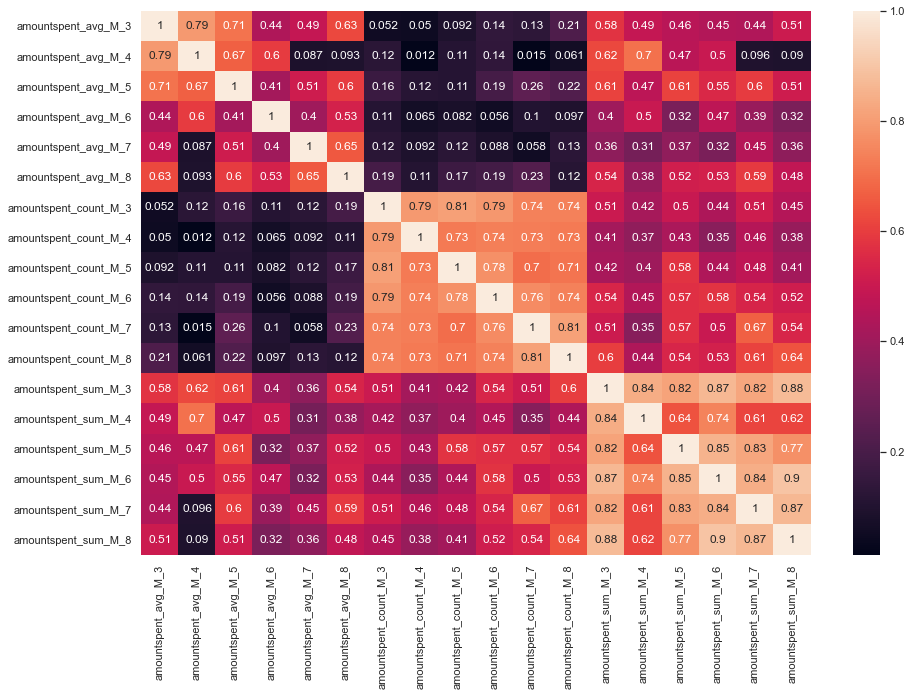

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(features_df.corr(), annot=True)
plt.show()

# Feature selection #1: Multivariate correlation filtering method

In [88]:
# Import libraries for Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# I define a target Variable and a list of my features to be used in train_test_split:

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['Customer ID', target_var]]



# Spliting data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], random_state=0, test_size=0.3)



In [89]:
# I build a dataframe with the correlation between features
# Here just the absolute value of the correlation coefficient is important and not the sign

corrmat = x_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,amountspent_sum_M_8,amountspent_sum_M_6,0.837098
1,amountspent_sum_M_6,amountspent_sum_M_8,0.837098
2,amountspent_sum_M_5,amountspent_sum_M_6,0.835137
3,amountspent_sum_M_6,amountspent_sum_M_5,0.835137
4,amountspent_sum_M_4,amountspent_avg_M_4,0.807837


In [90]:
# I'm gonna find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(x_train.shape[1]))

found 3 correlated groups
out of 18 total features


In [91]:
# now we can print out each group. We see that some groups contain only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

              feature1             feature2      corr
0  amountspent_sum_M_8  amountspent_sum_M_6  0.837098
7  amountspent_sum_M_8  amountspent_sum_M_7  0.804847

              feature1             feature2      corr
2  amountspent_sum_M_5  amountspent_sum_M_6  0.835137

              feature1             feature2      corr
4  amountspent_sum_M_4  amountspent_avg_M_4  0.807837



In [92]:
# we can now investigate further features within one group.


group = correlated_groups[0]
group

,feature1,feature2,corr
0,amountspent_sum_M_8,amountspent_sum_M_6,0.837098
7,amountspent_sum_M_8,amountspent_sum_M_7,0.804847


In [ ]:
# In this group, several features are highly correlated. Which one should we keep and which ones should we remove?

# One criteria to select which features to use from this group, would be to use those with less missing data. Since Our dataset contains no missing values, so this is not an option.



# Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [94]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['amountspent_sum_M_8']



#kh:baraye inke error "Unknown label type: 'continuous'" nagiram bayad Y ro encode mikardam.
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)





# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(x_train[features].fillna(0), y_train_encoded )

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [95]:
# get the feature importance attributed by the random forest model

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,amountspent_sum_M_6,0.432244
1,amountspent_sum_M_7,0.332409
2,amountspent_sum_M_8,0.235347


In [ ]:
# It can be seen that amount spent_M_2 is the most important and the others in this group can be eliminated.

In [96]:
# Now, Lets investigate the second group of correlated features

group = correlated_groups[1]
group

,feature1,feature2,corr
2,amountspent_sum_M_5,amountspent_sum_M_6,0.835137


In [97]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['amountspent_sum_M_5']



#kh:baraye inke error "Unknown label type: 'continuous'" nagiram bayad Y ro encode mikardam.
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)





# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(x_train[features].fillna(0), y_train_encoded )

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [98]:
# get the feature importance attributed by the random forest model

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,amountspent_sum_M_6,0.515484
1,amountspent_sum_M_5,0.484516


In [ ]:
# so It is clear above that amountspent_sum_M_5 is the most important and the other features in this group can be eliminated

In [99]:
# noe the 3rd group

group = correlated_groups[2]
group

,feature1,feature2,corr
4,amountspent_sum_M_4,amountspent_avg_M_4,0.807837


In [100]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['amountspent_sum_M_4']



#kh:baraye inke error "Unknown label type: 'continuous'" nagiram bayad Y ro encode mikardam.
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)





# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(x_train[features].fillna(0), y_train_encoded )

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [101]:
# get the feature importance attributed by the random forest model.

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
1,amountspent_sum_M_4,0.53449
0,amountspent_avg_M_4,0.46551


# Feature selection #2: Step forward feature selection

In [105]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['Customer ID', target_var]]



In [106]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score



In [107]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [108]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split( sample_set_df[all_features], sample_set_df[target_var], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((3460, 18), (1483, 18))

In [109]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [110]:
sfs = SFS(RandomForestRegressor(n_estimators=10, n_jobs=4, random_state=10), 
           k_features=14, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.5s finished

[2020-12-03 11:07:41] Features: 1/14 -- score: 0.35373895462951355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.3s finished

[2020-12-03 11:07:42] Features: 2/14 -- score: 0.5795543817846481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.5s finished

[2020-12-03 11:07:44] Features: 3/14 -- score: 0.6231853381620426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [111]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 15, 16, 17)

In [112]:
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]
selected_feat

Index(['amountspent_avg_M_3', 'amountspent_avg_M_4', 'amountspent_avg_M_5',
       'amountspent_avg_M_6', 'amountspent_avg_M_7', 'amountspent_avg_M_8',
       'amountspent_count_M_4', 'amountspent_count_M_7',
       'amountspent_count_M_8', 'amountspent_sum_M_3', 'amountspent_sum_M_4',
       'amountspent_sum_M_6', 'amountspent_sum_M_7', 'amountspent_sum_M_8'],
      dtype='object')

In [113]:
# Feature selection conclusion: From the list above I can now remove the SM4, SM7 and SM8
# This way, I have chosen 11 features aout of 24

In [54]:
# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]



sample_set_df[all_features].shape


(4943, 16)

In [55]:
sample_set_df[target_var].shape

(4943,)

# Linear reg- Two Loop CV - to study the effect of No. of repeats

In [258]:
from scipy.stats import sem
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from statistics import *
 
# evaluate a model with a given number of repeats_MAE
def evaluate_model_MAE(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LinearRegression()
	# evaluate model
	scores_MAE = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	return scores_MAE



# evaluate a model with a given number of repeats_ RMSE
def evaluate_model_RMSE(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LinearRegression()
	# evaluate model
	scores_RMSE = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)    
	return scores_RMSE


# evaluate a model with a given number of repeats_ r2
def evaluate_model_r2(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LinearRegression()
	# evaluate model
	scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)    
	return scores_r2




 
# create dataset

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]


X,y = sample_set_df[all_features], sample_set_df[target_var]


# configurations to test
repeats = range(1,20)
LR_MAE_Scores = list()
LR_RMSE_Scores = list()
LR_r2_Scores = list()

for r in repeats:
	# evaluate using a given number of repeats
	scores_MAE = evaluate_model_MAE(X, y, r)
	scores_RMSE = evaluate_model_RMSE(X, y, r)
	scores_r2 = evaluate_model_r2(X, y, r)    
	# summarize
	# print('>%d mean MAE=%.4f se=%.3f' % (r, mean(scores_MAE), sem(scores_MAE)))
	# print('>%d mean RMSE=%.4f se=%.3f' % (r, mean(scores_RMSE), sem(scores_RMSE)))
	# store
	LR_MAE_Scores.append(median(scores_MAE))
	LR_RMSE_Scores.append(median(scores_RMSE))
	LR_r2_Scores.append(median(scores_r2))
    
    

  

In [259]:
LR_MAE_Scores

[-388.2879144530483,
 -383.9041581694378,
 -386.24029286627143,
 -386.56174694263507,
 -386.24029286627143,
 -383.9041581694378,
 -383.9041581694378,
 -383.9041581694378,
 -385.9325707441485,
 -386.24029286627143,
 -386.24029286627143,
 -384.89876397460955,
 -384.89876397460955,
 -385.9325707441485,
 -385.9325707441485,
 -385.9325707441485,
 -385.9325707441485,
 -385.9325707441485,
 -386.24029286627143]

In [260]:
LR_RMSE_Scores

[-1335.2918454929104,
 -1167.769828844094,
 -1115.6944903704552,
 -1120.5651165243567,
 -1115.6944903704552,
 -1104.9999563980682,
 -1115.6944903704552,
 -1115.6944903704552,
 -1120.2237470424745,
 -1120.2237470424745,
 -1120.2237470424745,
 -1115.6944903704552,
 -1109.8291587704869,
 -1115.6944903704552,
 -1115.6944903704552,
 -1109.8291587704869,
 -1109.8291587704869,
 -1120.2237470424745,
 -1120.2237470424745]

In [152]:
LR_r2_Scores

[0.490727362779696,
 0.5320414489304373,
 0.5320414489304373,
 0.5320414489304373,
 0.589340463661588,
 0.6193833267041318,
 0.6193833267041318,
 0.6346743782334585,
 0.589340463661588,
 0.5541557888339608,
 0.5658822143732051,
 0.5936034547884524,
 0.5541557888339608,
 0.5541557888339608,
 0.5618826665698001,
 0.5661456576966646,
 0.5661456576966646,
 0.5541557888339608,
 0.5496517806028365]

Text(0, 0.5, 'mean_r2')

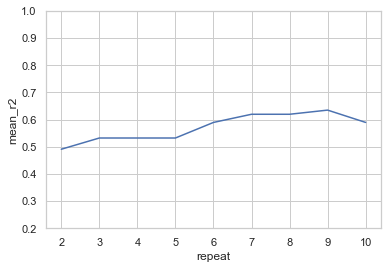

In [188]:
repeat= [2,3, 4,5,6,7,8,9,10]
mean_r2 = [0.490727362779696,
 0.5320414489304373,
 0.5320414489304373,
 0.5320414489304373,
 0.589340463661588,
 0.6193833267041318,
 0.6193833267041318,
 0.6346743782334585,
 0.589340463661588]

plt.plot(repeat, mean_r2)
plt.ylim(0.2, 1)
plt.xlabel('repeat')
plt.ylabel('mean_r2')

# Linear reg - to study the effect of No of Folds

In [123]:
import time

t0 = time.time()


scores=list()

for k in range(3,18):
    cv = RepeatedKFold(n_splits=k, n_repeats=8, random_state=1)

    model = LinearRegression()

    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)    
    scores.append(mode(scores_r2))

t1 = time.time()
running_time = t1-t0


scores

[0.4952167060900182,
 0.7213141244999999,
 0.7179485401370844,
 0.7295763308958113,
 0.7382216418137968,
 0.7472846148610517,
 0.7525112931236418,
 0.7490227775391731,
 0.7503418674774751,
 0.7503410553814707,
 0.7523930149944251,
 0.7602237290845882,
 0.7612490571241921,
 0.7625832308534953,
 0.7630243502975355]

In [125]:
running_time

4.182445049285889

Text(0, 0.5, 'r2')

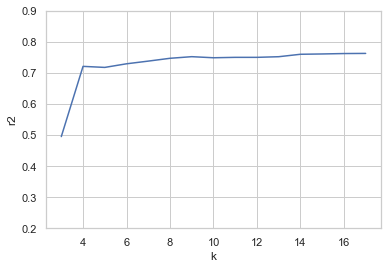

In [115]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#position = [0, 100, 200, 300]

plt.plot(k, scores)
plt.ylim(0.2, 0.9)
plt.xlabel('k')
plt.ylabel('r2')

# Simple LR- to study the effectiveness

In [60]:
import time
from scipy.stats import sem
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from statistics import *


 
# create dataset

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]


X,y = sample_set_df[all_features], sample_set_df[target_var]




t0 = time.time()


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

model = LinearRegression()

LR_MAE = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
LR_RMSE = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)      
LR_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)       

t1 = time.time()
LR_running_time = t1-t0



In [229]:

LR_MAE


array([-386.4468355 , -377.6197221 , -425.79391031, -316.3812728 ,
       -394.80629391, -390.1289934 , -514.76382639, -333.82154018,
       -334.76874579, -452.60923004, -317.69218517, -397.48458874,
       -348.41265635, -374.30530332, -521.03813075, -381.77456611,
       -451.58814407, -386.03375023, -370.70911347, -297.86687013,
       -327.37591064, -413.61929424, -527.38949338, -442.05759091,
       -261.27526058, -317.44175199, -393.71761693, -420.57299544,
       -326.17887684, -439.14919229, -386.67665838, -428.79516714,
       -375.83735164, -390.62489838, -335.89204178, -405.66632998,
       -349.30038924, -558.24169955, -337.00251833, -426.23366663,
       -362.71395285, -398.53530625, -441.80086114, -512.00276395,
       -305.95525162, -378.44190281, -369.80885142, -415.50306362,
       -357.73929826, -305.2554713 ])

In [230]:

LR_RMSE


array([-1707.85244349,  -752.22693406, -1215.61172275,  -579.00947151,
       -3267.03358882, -1454.97196824, -2882.30390014,  -631.31426657,
        -846.39174213, -1549.46818375,  -590.09583129, -1111.4610458 ,
        -715.94487145, -1253.62562151, -2893.77321724,  -872.08338868,
       -3340.21811501, -1329.85405663, -1119.92793494,  -506.99958691,
        -548.05727285, -1098.538867  , -2832.7121351 , -1072.25666181,
        -471.99045973,  -572.79479751, -1309.61406254, -3258.23327832,
        -826.72124796, -1718.32585033,  -950.92494519, -1259.33452432,
       -1585.62790756, -1311.10827807,  -688.452863  , -3348.91531919,
        -935.53337915, -3327.20266397,  -688.34077167, -1121.20229811,
        -684.10358733, -1005.7071481 , -3311.56585356, -2448.47282476,
        -485.14281911,  -850.62195072, -1044.46062599, -1312.11872474,
       -1750.07717056,  -572.8284368 ])

In [231]:
LR_r2

array([ 0.74902278, -0.01368901,  0.90489245,  0.71602033,  0.47899105,
        0.11540241, -1.70340607,  0.50246367,  0.88222046, -0.59017225,
        0.35841017,  0.86663784,  0.80673893, -0.30821706,  0.29021553,
        0.7015985 ,  0.56161922,  0.3336821 ,  0.80565734,  0.6170617 ,
        0.66075227,  0.87725624, -1.22534324,  0.64764381,  0.34999982,
        0.23183444,  0.04529193,  0.4939872 ,  0.88798815,  0.81518985,
       -0.17984159,  0.83221952,  0.84805497, -1.63327731,  0.73841273,
        0.45514146,  0.86530538, -2.51274   ,  0.69181291,  0.44600242,
        0.35082594, -0.05757859,  0.49207695, -0.8283161 ,  0.75486502,
        0.66703591,  0.82467272,  0.87706229,  0.74084465,  0.78398059])

In [233]:
LR_running_time

0.6552953720092773

# Random Forest Resgression- 2loop C.V- to study the effect of No. of repeats

In [142]:
from scipy.stats import sem
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = RandomForestRegressor()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
	return scores
 
# create dataset

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]


X,y = sample_set_df[all_features], sample_set_df[target_var]


# configurations to test
repeats = range(1,10)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
    
    
    
    
#rf3 = randomForest(X,y,maxnodes=24,ntree=5000)

>1 mean=0.6484 se=0.079
>2 mean=0.6572 se=0.053
>3 mean=0.6473 se=0.046
>4 mean=0.6492 se=0.041
>5 mean=0.6494 se=0.037
>6 mean=0.6540 se=0.034
>7 mean=0.6786 se=0.027
>8 mean=0.6615 se=0.029
>9 mean=0.6600 se=0.030


Text(0, 0.5, 'mean_r2t')

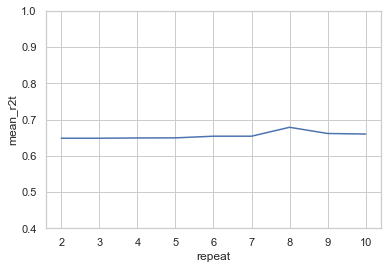

In [158]:
repeat= [2,3,4,5,6,7,8,9,10]
mean_r2 = [0.6484, 0.6484, 0.6492, 0.6494, 0.6540, 0.6540, 0.6786, 0.6615, 0.6600]

plt.plot(repeat, mean_r2)
plt.ylim(0.4, 1)
plt.xlabel('repeat')
plt.ylabel('mean_r2t')

# Random Forest - to study the effect of No of Folds

In [145]:
# 8-Kfold random forest regression for different values of K

from statistics import *
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold




import time
t0 = time.time()


scores=list()



target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]
X,y = sample_set_df[all_features], sample_set_df[target_var]


for k in range(3,18):


    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=k, n_repeats=8, random_state=1)
    # define the model
    model = RandomForestRegressor()
    # evaluate the model and collect results
    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

    scores.append(mode(scores_r2))

t1 = time.time()
running_time = t1-t0


scores




[0.8869756490502718,
 0.9131791919384322,
 0.9276111144552442,
 0.9321341405069208,
 0.9463159959329365,
 0.948941732945049,
 0.9493492388630158,
 0.9622500275801548,
 0.950681496325971,
 0.9686759735443389,
 0.9486106745938685,
 0.9615687729666677,
 0.9652570059623318,
 0.9622782320485379,
 0.9741496103041647]

In [146]:
running_time

1378.2005248069763

Text(0, 0.5, 'r2')

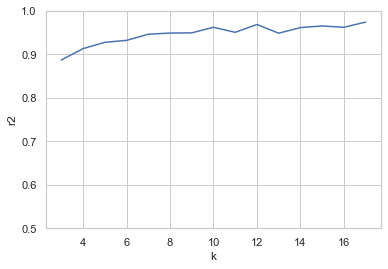

In [149]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#position = [0, 100, 200, 300]

plt.plot(k, scores)
plt.ylim(0.5, 1)
plt.xlabel('k')
plt.ylabel('r2')

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [179]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='r2')

    return scores


scores=rfr_model(X,y)
scores

array([0.4368954 , 0.43706293, 0.93197571, 0.97238778, 0.83728934,
       0.22618855, 0.80370385, 0.16375503, 0.7302704 , 0.96403097])

# Simple RF To study the effectiveness

In [234]:
import time
from sklearn.model_selection import KFold
t0 = time.time()


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

model = RandomForestRegressor()

RF_MAE = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
RF_RMSE = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)      
RF_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)       

t1 = time.time()
LR_running_time = t1-t0


In [235]:
RF_MAE

array([-272.76142158, -284.24467929, -303.28758598, -271.51654332,
       -357.44309449, -271.71219789, -313.24944287, -243.86513237,
       -293.26237296, -316.13373279, -225.187916  , -265.56933919,
       -323.98556707, -307.28831506, -285.28276243, -288.30482099,
       -398.1169964 , -302.30198186, -263.42665769, -256.53775804,
       -256.66149677, -302.38901374, -304.23708923, -392.49659275,
       -222.61150565, -248.23278739, -346.77408587, -348.05307146,
       -258.58748626, -303.50684338, -275.77395119, -295.88470358,
       -274.99248796, -269.95750715, -268.77012613, -334.08988719,
       -288.91993733, -336.83357553, -287.94206842, -291.7120569 ,
       -276.96849503, -256.82708842, -419.28391683, -338.7109698 ,
       -243.8142984 , -319.09026842, -283.7040301 , -272.93429415,
       -229.78540168, -284.09102652])

In [236]:
RF_RMSE

array([ -728.11668229,  -620.37841442,  -944.10975562,  -641.05982788,
       -2335.82418151, -1232.12793086,  -920.80759751,  -522.44057985,
        -740.65575293,  -956.99177348,  -519.18257688,  -603.51269119,
        -811.02456977,  -852.54822552,  -746.1187388 ,  -738.82257734,
       -3013.54258302, -1266.45982987,  -595.97327699,  -735.20681553,
        -501.81315002,  -710.47807228, -1398.26778633, -1123.60525978,
        -515.66322452,  -538.63355816, -1055.26335877, -2354.31558069,
        -607.42960519,  -646.98000307,  -556.60199311,  -732.56929229,
        -823.96146883,  -864.66999126,  -789.19766408, -2568.66193823,
        -866.56858766, -1276.30653453,  -687.17531959,  -839.68705337,
        -681.83001699,  -505.2679573 , -2561.40536347, -1617.999801  ,
        -480.71428276,  -802.07941681,  -806.63814146,  -887.48904024,
        -572.25204951,  -759.81430222])

In [237]:
RF_r2

array([ 0.96024105,  0.26855963,  0.95036887,  0.50047714,  0.69168914,
        0.36091294,  0.72178411,  0.69319384,  0.89872221,  0.36597282,
        0.54611941,  0.95965217,  0.7247943 ,  0.35461502,  0.96111025,
        0.76559559,  0.68538775,  0.39074838,  0.94845383,  0.374685  ,
        0.7082874 ,  0.9516097 ,  0.41525653,  0.6565068 ,  0.12172252,
        0.49267622,  0.38795793,  0.70631296,  0.94001329,  0.96478348,
        0.58105546,  0.92715322,  0.96635321, -0.04632815,  0.62067316,
        0.68128392,  0.88518055,  0.50399214,  0.67383747,  0.73497418,
        0.37382693,  0.72474592,  0.70022552,  0.27625159,  0.76196766,
        0.70815259,  0.88480733,  0.97066509,  0.97593018,  0.66483278])

In [238]:
RF_time=LR_running_time
RF_time

166.03603291511536

# Multivariate Adaptive Regression Splines- Repeated C.V - to study the effect of the No. of Folds

In [ ]:

# check pyearth version
import pyearth
# display version
print(pyearth.__version__)

In [135]:

# Multivariate Adaptive Regression Splines


from statistics import *
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from pyearth import Earth



import time
t0 = time.time()


scores=list()



target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]
X,y = sample_set_df[all_features], sample_set_df[target_var]


for k in range(3,18):


    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=k, n_repeats=8, random_state=1)
    # define the model
    model = Earth()
    # evaluate the model and collect results
    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

    scores.append(mode(scores_r2))

t1 = time.time()
running_time = t1-t0


scores








# report performance
#print('MAE: %.3f (%.3f)' % (median(n_scores), std(n_scores)))



[-0.3132881146248361,
 0.8180722223190717,
 0.8571619253495335,
 0.8551900760544329,
 0.8864140552037438,
 0.91636392221566,
 0.9025190053137766,
 0.9150970464491741,
 0.9142861157868561,
 0.9159853287712212,
 0.9169886838958743,
 0.9118679548865583,
 0.8907167733922431,
 0.8776922557355898,
 0.8694727482839569]

In [140]:
running_time

2000.8637537956238

Text(0, 0.5, 'r2')

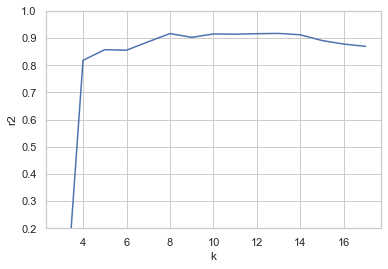

In [141]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#position = [0, 100, 200, 300]

plt.plot(k, scores)
plt.ylim(0.2, 1)
plt.xlabel('k')
plt.ylabel('r2')

# Simple MARS To study the effectiveness

In [239]:
import time
from sklearn.model_selection import KFold
t0 = time.time()


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

model = Earth()

MARS_MAE = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
MARS_RMSE = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)      
MARS_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)       

t1 = time.time()
MARS_running_time = t1-t0


In [240]:
MARS_MAE

array([ -295.69319075,  -294.94231245,  -353.41892174,  -278.72230786,
        -353.90139108,  -349.07432148,  -576.30536397,  -268.67940898,
        -328.66098255,  -334.85542372,  -221.01352347,  -325.62134307,
        -337.15684202,  -311.40407412,  -548.07917134,  -306.04117382,
        -412.82858651,  -326.00015364,  -376.63877966,  -309.44481568,
        -291.76698184,  -401.06762261,  -506.47541209,  -448.39129352,
        -260.19118509,  -217.04195186,  -318.47515833,  -389.95095294,
        -308.71272709,  -331.74175849,  -339.78932673,  -328.1280935 ,
        -376.02825435,  -273.37788731,  -326.17448187,  -371.04055685,
        -292.22633857,  -577.30790162,  -300.81351736,  -303.85592983,
        -313.97892476,  -325.7874533 ,  -431.22504228, -1229.69882482,
        -293.84019536,  -315.54057337,  -347.04817692,  -356.82558837,
        -250.52901779,  -296.29785156])

In [241]:
MARS_RMSE

array([  -993.33237488,   -791.23633435,  -1638.60488107,   -683.64614204,
        -2822.91274257,  -1647.591006  ,  -5425.29837047,   -723.35077333,
        -1169.92927068,  -1337.5473676 ,   -488.4845952 ,  -1441.30559645,
        -1050.92009035,   -970.63307956,  -5608.40450969,   -880.78309929,
        -2937.61988287,  -1376.12180256,  -1418.32641825,  -1214.54032882,
         -962.2566041 ,  -2423.31485673,  -4830.07357108,  -1501.84973588,
         -855.02048442,   -429.94574845,   -853.65088484,  -2930.16993245,
        -1202.30913713,  -1127.7883083 ,  -1272.78102412,  -1445.09634581,
        -1736.96563203,   -842.3397434 ,  -1093.20137309,  -2986.68634742,
        -1314.6778011 ,  -5326.52807623,   -962.41078654,   -768.11233491,
         -773.53688514,  -1191.5492629 ,  -2881.98697911, -18105.77301962,
         -903.99682376,   -896.75146484,  -1444.11179511,  -1646.2270037 ,
         -792.83077607,  -1411.27390949])

In [242]:
MARS_r2

array([ 9.15097046e-01, -1.21552029e-01,  8.27188071e-01,  6.04106244e-01,
        6.11014966e-01, -1.34319313e-01, -8.57809193e+00,  3.46822093e-01,
        7.74966988e-01, -1.84942252e-01,  5.60342870e-01,  7.75737703e-01,
        5.83586695e-01,  2.15750471e-01, -1.66609836e+00,  6.95615225e-01,
        6.60927127e-01,  2.86511026e-01,  6.88297437e-01, -1.19754344e+00,
       -4.57957249e-02,  4.02705853e-01, -5.46993046e+00,  3.08746461e-01,
       -1.13304528e+00,  5.67203220e-01,  5.94356496e-01,  5.90755580e-01,
        7.63092899e-01,  9.20389574e-01, -1.11367692e+00,  7.79070951e-01,
        8.17666529e-01, -8.69111948e-02,  3.40418414e-01,  5.66634173e-01,
        7.34006922e-01, -8.00276548e+00,  3.97539719e-01,  7.39990396e-01,
        1.69997357e-01, -4.84545728e-01,  6.15306224e-01, -9.89757911e+01,
        1.48862184e-01,  6.29943180e-01,  6.64828572e-01,  8.06483375e-01,
        9.46812843e-01, -3.11191931e-01])

In [243]:
MARS_running_time 

220.2191140651703

# Investigation on the statistical difference of 3 Methods

In [244]:

# Friedman test for MAE
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(LR_MAE, RF_MAE, MARS_MAE)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=75.960, p=0.000
Different distributions (reject H0)


In [245]:
# Friedman test for RMSE
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(LR_RMSE, RF_RMSE, MARS_RMSE)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=45.480, p=0.000
Different distributions (reject H0)


In [246]:
# Friedman test for r2
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(LR_r2, RF_r2, MARS_r2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=48.160, p=0.000
Different distributions (reject H0)


# Investigation of pairwaise difference between methods

In [247]:

# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(LR_r2, RF_r2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=158.000, p=0.000
Different distribution (reject H0)


In [248]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(RF_r2, MARS_r2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=53.000, p=0.000
Different distribution (reject H0)


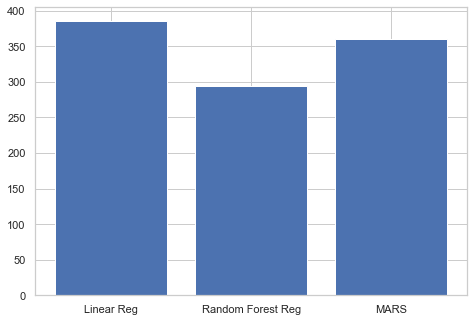

In [262]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Method = ['Linear Reg', 'Random Forest Reg', 'MARS']
MAE = [-mean(LR_MAE_Scores),-mean(RF_MAE),-mean(MARS_MAE)]
ax.bar(Method,MAE)
plt.show()

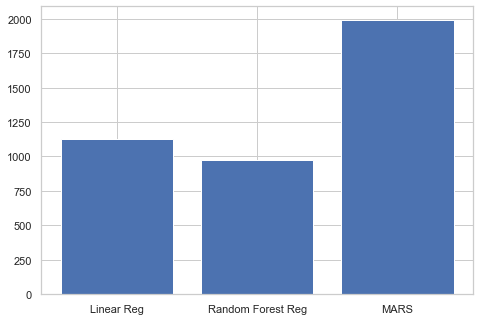

In [263]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Method = ['Linear Reg', 'Random Forest Reg', 'MARS']
RMSE = [-mean(LR_RMSE_Scores),-mean(RF_RMSE),-mean(MARS_RMSE)]
ax.bar(Method,RMSE)
plt.show()

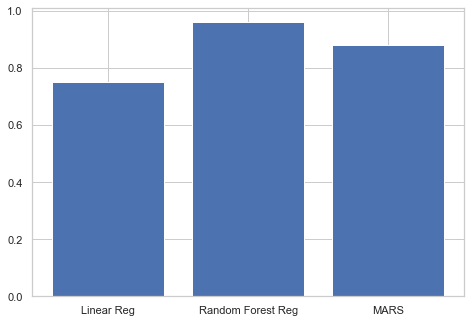

In [254]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Method = ['Linear Reg', 'Random Forest Reg', 'MARS']
r2 = [0.75,0.96,0.88]
ax.bar(Method,r2)
plt.show()

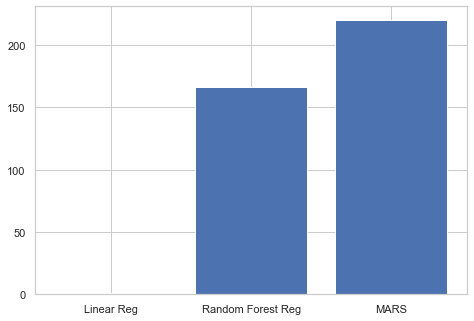

In [255]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Method = ['Linear Reg', 'Random Forest Reg', 'MARS']
RunTime = [0.65,166,220]
ax.bar(Method,RunTime)
plt.show()

# End of Coding

# End of Coding

# End of Coding

# End of Coding

# End of Coding

# End of Coding

In [ ]:
###3 shayad bayad avval ba split train o test ra tashkil bedaham va ba"d rooye train CV konim! ta betavanim ba'dan ba test eman moghayeseh konim.

# Simple KFold

In [54]:
# Import libraries for Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# I define a target Variable and a list of my features to be used in train_test_split:

target_var = 'CLV_'+clv_freq
features = selected_feat.drop(['amountspent_sum_M_8', 'amountspent_sum_M_9'])



# Spliting data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[features], sample_set_df[target_var], random_state=0, test_size=0.3)


# Model Fitting
LR = LinearRegression()
LR.fit(x_train, y_train)



YPredictions_Traindata = LR.predict(x_train)
YPredictions_Testdata = LR.predict(x_test)

LinearRegression()

In [451]:
# What is my Y intercept?

LR.intercept_

88.4300238954416

In [452]:
# What is my coefficents?

LR.coef_

array([-7.98258185e-01, -8.31797380e-02,  1.69773843e-01, -2.82265355e-01,
        4.52294791e-01, -1.58758871e-01,  3.00958272e-01,  2.78601026e-01,
       -1.43443706e+02,  6.07595769e+01, -4.04961741e+01, -1.96686152e+01,
        2.56845713e+01,  2.02662579e+00, -3.56198332e+01,  3.68916811e+01,
        1.22291490e+00,  4.83276854e-02,  1.25247605e-01,  3.96027935e-01,
       -4.57141240e-01, -6.17473369e-02, -1.13396669e-01,  7.86041597e-02])

In [55]:
# Showing my Coefficients per feature in a DataFrame



coef = pd.DataFrame(list(zip(all_features, LR.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,amountspent_avg_M_2,0.252252
1,amountspent_avg_M_3,-0.197252
2,amountspent_avg_M_4,-0.377477
3,amountspent_avg_M_5,-0.471333
4,amountspent_avg_M_6,-0.188528
5,amountspent_avg_M_7,-0.084038
6,amountspent_avg_M_8,0.060730
7,amountspent_avg_M_9,0.003872
8,amountspent_count_M_2,82.487711
9,amountspent_count_M_3,120.916067


In [56]:
# lets see how our model works on input data


YPredictions_Traindata = LR.predict(x_train)
YPredictions_Testdata = LR.predict(x_test)

In [500]:
# Import libraries for performance acessment

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

In [497]:
# Now lets compare R-Squared Performance on Training and Test Datasets


# The R-squared value, denoted by R 2, is the square of the correlation. It measures the proportion of variation in the 
# dependent variable that can be attributed to the independent variable. The R-squared value R 2 is always between 0 and 1 
# inclusive. ... Correlation r = 0.9; R=squared = 0.81.



print('Train data R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = YPredictions_Traindata))
print('Test data R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = YPredictions_Testdata))

Train data R-Squared: 0.3941
Test data R-Squared: 0.2226


In [498]:
# Now lets compare MSE on Training and Test Datasets

print('Train data MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = YPredictions_Traindata))
print('Test data MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = YPredictions_Testdata))

Train data MSE: 170.7449
Test data MSE: 175.3203


In [501]:
print("Train data MAE:", mean_absolute_error(y_true = y_train, y_pred = YPredictions_Traindata))
print("Test data MAE:", mean_absolute_error(y_true = y_test, y_pred = YPredictions_Testdata))

Train data MAE: 380.43184239267475
Test data MAE: 398.05270316985644


In [505]:
print("Train data RMSE:", np.sqrt(mean_squared_error(y_true = y_train, y_pred = YPredictions_Traindata)))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_true = y_test, y_pred = YPredictions_Testdata))) 


Train data RMSE: 2820.478832356188
Test data RMSE: 1698.4270796150554


**** Train/test split have its dangers. What if the split we make isn’t random? 

What if one subset of our data has only people from a certain Country but not others or only people purchased at a certain time?

This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

************************************************
How many folds? Well, the more folds we have, we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised.

In [71]:

# cross validation method?


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

target_var = 'CLV_'+clv_freq

all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', 'amountspent_sum_M_7', 'amountspent_sum_M_9', target_var]]



# Spliting data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)


# prepare cross validation
kfold = KFold(5, True, 1)
# enumerate splits
for train, test in kfold.split(data):



# Model Fitting
 LR2 = LinearRegression()
 LR2.fit(x_train, y_train)




 Y2Predictions_Traindata = LR2.predict(x_train)
 Y2Predictions_Testdata = LR2.predict(x_test)



from sklearn.metrics import r2_score, median_absolute_error




print('Train data R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = Y2Predictions_Traindata))
print('Test data R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = Y2Predictions_Testdata))



print('Train data MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = Y2Predictions_Traindata))
print('Test data MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = Y2Predictions_Testdata))


NameError: name 'data' is not defined

In [ ]:
# CV pure code with Inner and Outer loop:
    
    
#Load libraries

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

#Load data
target_var = 'CLV_'+clv_freq

all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]
X,y = sample_set_df[all_features], sample_set_df[target_var]

#X.shape, y.shape




rounds=10
N_split=7


outer_training_scores = np.zeros(rounds)
outer_validation_score = np.zeros(rounds)
nested_validation_scores = np.zeros(N_split)
nested_training_score = np.zeros(N_split)

x_train_base=[]
x_test_base=[]
y_train_base=[]
y_test_base=[]




for sead in range(rounds):
    XTrain, XTest, YTrain, YTest = train_test_split(sample_set_df[all_features], sample_set_df[target_var], random_state=sead, test_size=0.3)

############################################################333
# for not getting " Got'continuous target' instead of Multiclass" in kf7 loop I need to do this encoding
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    YTrain = label_encoder.fit_transform(YTrain)   
##################################################################

 
   
    kf7= StratifiedKFold(n_splits=N_split, shuffle=True, random_state=sead)
    
    i=1
    for train_index, test_index in kf7.split(XTrain, YTrain):
        
        
        x_train, x_test = XTrain[train_index,:], XTrain[test_index,:]
        y_train, y_test = YTrain[train_index,:], YTrain[test_index,:]
        
        
        x_train_base.append(x_train)
        x_test_base.append(x_test)
        y_train_base.append(y_train)
        y_test_base.append(y_test)
    
        LR=model.fit(x_train, y_train) 
        YPredictions_Traindata = LR.predict(x_train)
        YPredictions_Testdata = LR.predict(x_test)
        
        

    
        nested_training_scores.append(r2_score(y_true = y_train, y_pred = YPredictions_Traindata))
        nested_validation_scores.append(r2_score(y_true = y_test, y_pred = YPredictions_Testdata))
  
    i=+1
    
    
# Here I nees to take the strongest of every repeat and test with the XTest and YTest   
    ii=np.argmax(nested_validation_scores)
    j=ii-1
    
  
    
#I stored all the train and test data and here recoverd the strongest one. 
# however, it was possible to store just the indecis generated in each fold and rebuild the test and train data here.
# the latter may get lower capacity becaus we store 2 series of indecis instead of 4 searies of values


# now again I train the same model but test it in the outer loop:
    LR=model.fit(x_train_base[j], y_train_base[j]) 
    YPredictions_Traindata = LR.predict(XTrain)
    YPredictions_Testdata = LR.predict(XTest)
    
    outer_training_scores.append(r2_score(y_true = y_train, y_pred = YPredictions_Traindata))
    outer_validation_scores.append(r2_score(y_true = YTest, y_pred = YPredictions_Testdata))

print('Train data R-Squared: %0.4f' % np.mean(outer_training_scores))
print('Test data R-Squared: %0.4f' % np.mean(outer_validation_scores))
    
    
    
    

In [ ]:
#trainindex=pd.DataFrame() 
#testindex=pd.DataFrame() 
#itrain=np.zeros(N_split)
#itest=np.zeros(N_split)


# for train_index, test_index in kf3.split(sample_set_df):  print(train_index, test_index)

# for train_index, test_index in kf3.split(sample_set_df):  print(np.take(sample_set_df,train_index), np.take(sample_set_df,test_index))


#X.to_numpy()   
    
        #z = np.array([x, y])
        # print(np.take(rn,train_index), np.take(rn,test_index))
        # trainindex[i]=train_index
        #itrain.append(train_index) , itest.append(test_index)
        #dfObj.iloc[ 0:2 , : ]
        
#test_data = splitted_dataframe.iloc[test_index]



# print(f" R-sq for the fold no. {i} on the test set: {r2_score(y_true = y_test, y_pred = YPredictions_Testdata)}") 
# also we could use cross_validate to specify metrics
#for i, score in enumerate(cross_validate(model, X,y, cv=3)["test_score"]):
    #print(f"accuracy for the fold no. {i} on the test set: {score}")  
    
#or nested_score[i]=.....    
# np.mean(nested_test)
    
# print(f" ave R-sq of KFold for iteration no. {sead} on the test set: {np.mean(,...ed_scores)}")  
    
# other structure:  outer_test[i]= np.max(nested_test) or=nested_test.mean() or clf.best_score_

    
    

# nested_score = cross_val_score(clf, X=X, y=y, cv=stratifiesKFold)
# Stratified
        
    

In [ ]:
# a wrong grid search for RFM


#Load libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold



import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


#Load data
target_var = 'CLV_'+clv_freq

all_features = [x for x in sample_set_df.columns if x not in ['CustomerID','amountspent_sum_M_4', 'amountspent_sum_M_7', 'amountspent_sum_M_8', target_var]]
X,y = sample_set_df[all_features], sample_set_df[target_var]





#Set a seed to ensure reproducibility
seed = 42

#Instantiate the Random Forest classifier
rf = RandomForestRegressor(random_state=seed)

#Number of rounds
rounds = 12



#Define the hyperparameter grid
rf_param_grid = {'max_depth': [10, 50],
                'n_estimators': [100, 200, 400]}

#Create arrays to store the scores
outer_scores = np.zeros(rounds)
nested_scores = np.zeros(rounds)


# Loop for each round
for i in range(rounds):

   #Define both cross-validation objects (inner & outer)
   inner_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=i)
   outer_cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=i)

   # Non-nested parameter search and scoring
   clf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=inner_cv)
   clf.fit(X, y)
   outer_scores[i] = clf.best_score_

   # Nested CV with parameter optimization
   nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
   nested_scores[i] = nested_score.mean()
    
    
    

#Take the difference from the non-nested and nested scores
score_difference = outer_scores - nested_scores

print("Avg. difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))    

In [ ]:
from sklearn.model_selection import KFold # import KFold

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', 'amountspent_sum_M_7', 'amountspent_sum_M_9', target_var]]
X,y = sample_set_df[all_features], sample_set_df[target_var]

kf = KFold(n_splits=10) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
# Model Fitting
LR = LinearRegression()
LR.fit(x_train, y_train)   

####Na! inke dareh faghat x ro taghsim mikoneh o dar mohasebeh lahaz mikoneh ke!
##### koja nesbat e train o test ro goftim?


print('Train data R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = YPredictions_Traindata))
print('Test data R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = YPredictions_Testdata))